In [1]:
import sys
import numpy as np
# insert at position 1 in the path, as 0 is the path of this file.
sys.path.insert(1, r'..\modules\\')

from modelclass import ModelTrainer

# Overview

1. Logistic Classifier Default
2. XGB Classifier Default
3. XGB Classifier feat_eng1
4. XGB Classifier feat_eng2
3. XGB Classifier Resample
4. XGB Hyperparameter Tuning

In [2]:
feat_eng1= r'..\data\feature1.csv'
feat_eng2= r'..\data\feature2.csv'
feat_eng3=r'..\data\feature3.csv'

## 1. Logit 

In [3]:
mt =ModelTrainer(data_loc=r'..\data\feature1.csv')

In [4]:
mt.base_run()

Best Threshold=0.800276, F-Score=0.475
precision, recall, threshold, f1score attributes updated
Best Threshold=0.594330, G-Mean=0.757
tpr, fpr, gmean attributes updated
feature_importance attribute updated


lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


In [5]:
mt.pr_auc

0.40010362885353684

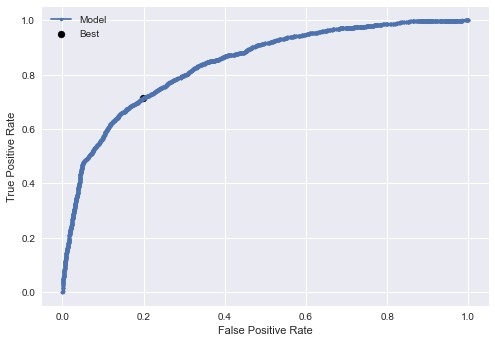

In [6]:
mt.plot_roc_curve()

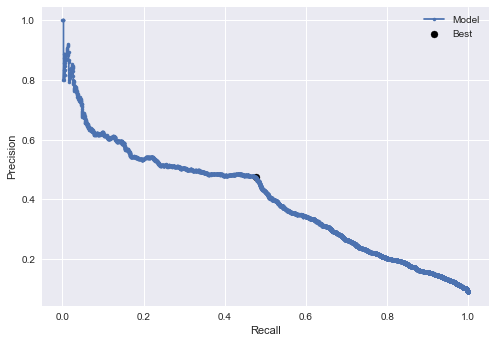

In [7]:
mt.plot_precision_recall_curve()

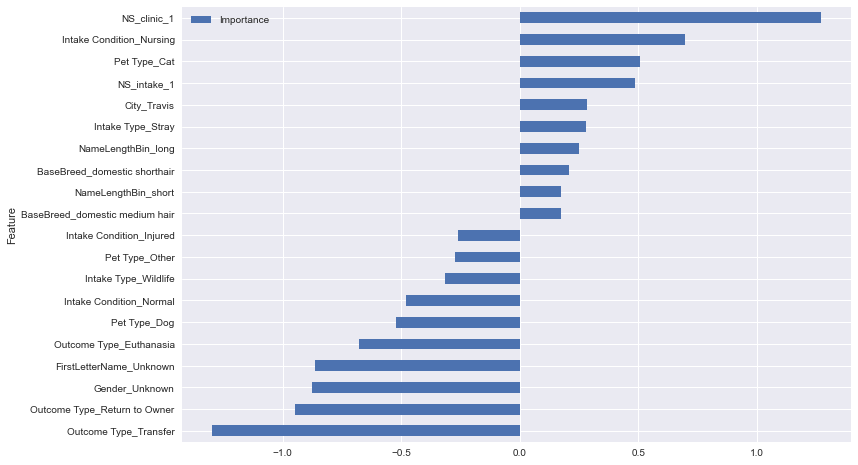

In [8]:
mt.plot_feature_importance()

In [9]:
mt.log

,Name,ModelType,F1,PR-AUC,G-mean,ROC-AUC,PRThreshold,ROCThreshold,LogTime
0,log0,log,NaN,0.390182,0.756192,0.839362,0.960302,0.612713,2022-02-22 20:21:04.997572
1,log1,log,0.475022,0.400104,0.756835,0.839932,0.800276,0.594330,2022-02-22 20:21:49.295069
2,xgb0,xgb,0.656668,0.688538,0.836489,0.917602,0.320857,0.076146,2022-02-22 20:22:07.573218
3,xgb1,xgb,0.658920,0.691520,0.839152,0.919203,0.308781,0.070381,2022-02-22 20:23:17.668959
4,xgbsmote0.1random0.122,xgb,0.656404,0.694120,0.837511,0.919497,0.395801,0.113287,2022-02-22 20:59:02.649490
5,xgbsmote0.1random0.179999999999999973,xgb,0.653551,0.694243,0.839835,0.918925,0.511347,0.157444,2022-02-22 20:59:18.981777
0,log2,log,0.475022,0.400104,0.756835,0.839932,0.800276,0.594330,2022-02-22 21:01:41.166538


In [10]:
mt.fi

,ModelName,Feature,Importance,SHAP
0,log0,Age upon Intake Days,0.000030,NaN
1,log0,Outcome Type_Adoption,0.879263,NaN
2,log0,Outcome Type_Died,-0.006541,NaN
3,log0,Outcome Type_Disposal,-0.022202,NaN
4,log0,Outcome Type_Euthanasia,-0.330484,NaN
...,...,...,...,...
125,log2,FirstLetterName_Y,-0.014900,NaN
126,log2,FirstLetterName_Z,0.019851,NaN
127,log2,NameLengthBin_long,0.251514,NaN
128,log2,NameLengthBin_med,0.090614,NaN


# 2. XGBoost Base model

In [11]:
xgbm =ModelTrainer(model='xgb')
xgbm.base_run()

[21:01:43] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Best Threshold=0.320857, F-Score=0.657
precision, recall, threshold, f1score attributes updated
Best Threshold=0.076146, G-Mean=0.836
tpr, fpr, gmean attributes updated


ntree_limit is deprecated, use `iteration_range` or model slicing instead.


feature_importance attribute updated


In [12]:
xgbm.pr_auc

0.6885377932301285

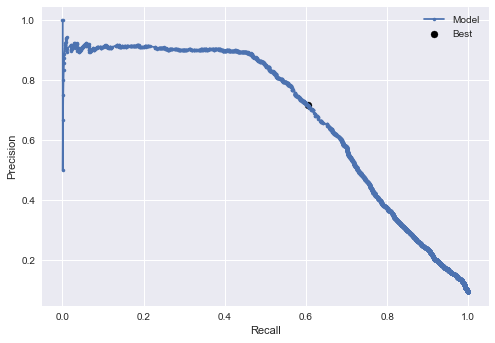

In [13]:
xgbm.plot_precision_recall_curve()

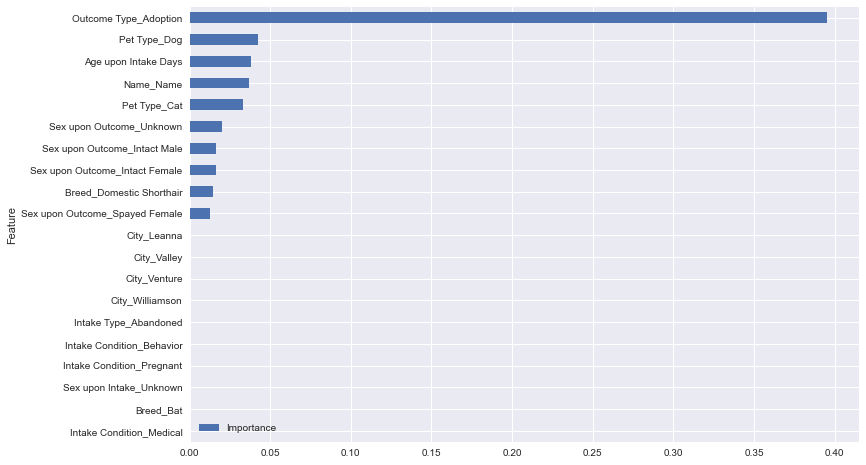

In [14]:
xgbm.plot_feature_importance()

In [15]:
xgbm.log

,Name,ModelType,F1,PR-AUC,G-mean,ROC-AUC,PRThreshold,ROCThreshold,LogTime
0,log0,log,NaN,0.390182,0.756192,0.839362,0.960302,0.612713,2022-02-22 20:21:04.997572
1,log1,log,0.475022,0.400104,0.756835,0.839932,0.800276,0.594330,2022-02-22 20:21:49.295069
2,xgb0,xgb,0.656668,0.688538,0.836489,0.917602,0.320857,0.076146,2022-02-22 20:22:07.573218
3,xgb1,xgb,0.658920,0.691520,0.839152,0.919203,0.308781,0.070381,2022-02-22 20:23:17.668959
4,xgbsmote0.1random0.122,xgb,0.656404,0.694120,0.837511,0.919497,0.395801,0.113287,2022-02-22 20:59:02.649490
5,xgbsmote0.1random0.179999999999999973,xgb,0.653551,0.694243,0.839835,0.918925,0.511347,0.157444,2022-02-22 20:59:18.981777
6,log2,log,0.475022,0.400104,0.756835,0.839932,0.800276,0.594330,2022-02-22 21:01:41.166538


<AxesSubplot:ylabel='Feature'>

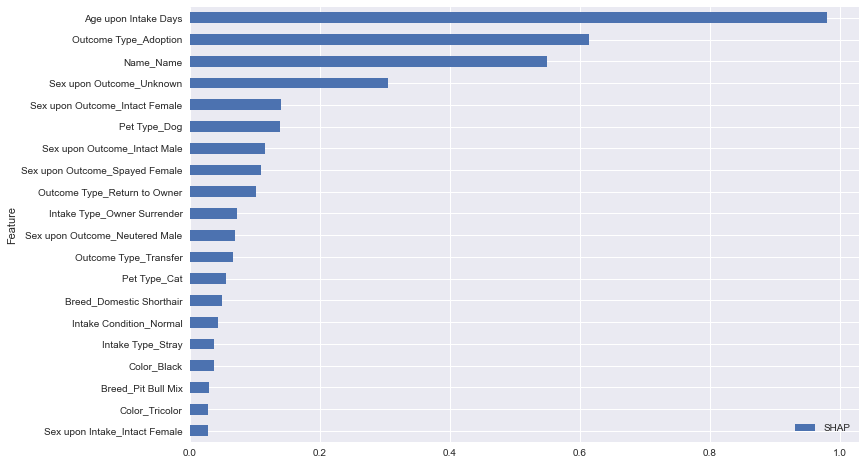

In [16]:
# xgbm.feature_importance[['Feature','SHAP']].sort_values(by='SHAP',ascending=False).head(20).plot(kind='barh',)
xgbm.feature_importance[['Feature','SHAP']].sort_values(by='SHAP',ascending=True).tail(20).plot.barh('Feature','SHAP',figsize=(12,8))

Most Relevant Features
1. Age
2. Spayed or Neutered at Facility
3. Unknown Name 
4. OutcomeType
5. Gender
6. Pet Type
7. 

# 3. XGBoost Feature Engineering set 1

In [17]:
xgbm =ModelTrainer(model='xgb',data_loc=feat_eng1)
xgbm.base_run()

[21:01:48] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Best Threshold=0.308781, F-Score=0.659
precision, recall, threshold, f1score attributes updated
Best Threshold=0.070381, G-Mean=0.839
tpr, fpr, gmean attributes updated


ntree_limit is deprecated, use `iteration_range` or model slicing instead.


feature_importance attribute updated


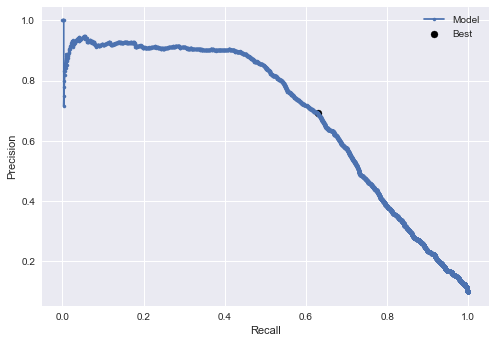

In [18]:
xgbm.plot_precision_recall_curve()

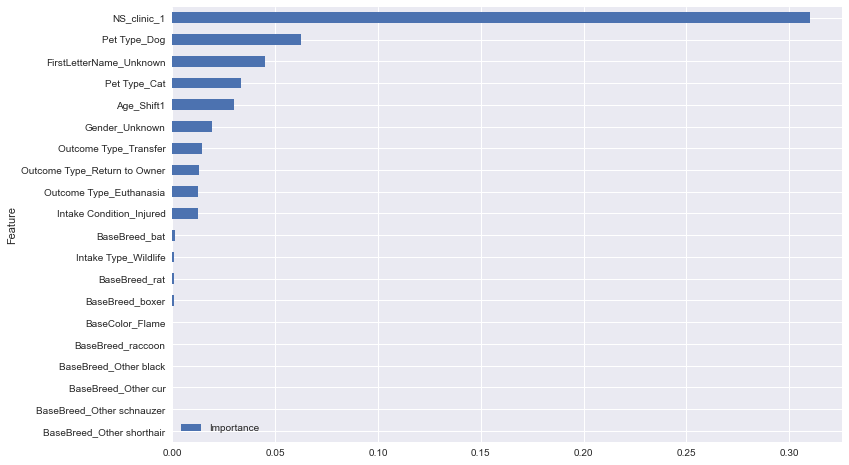

In [19]:
xgbm.plot_feature_importance()

In [20]:
xgbm.log

,Name,ModelType,F1,PR-AUC,G-mean,ROC-AUC,PRThreshold,ROCThreshold,LogTime
0,log0,log,NaN,0.390182,0.756192,0.839362,0.960302,0.612713,2022-02-22 20:21:04.997572
1,log1,log,0.475022,0.400104,0.756835,0.839932,0.800276,0.594330,2022-02-22 20:21:49.295069
2,xgb0,xgb,0.656668,0.688538,0.836489,0.917602,0.320857,0.076146,2022-02-22 20:22:07.573218
3,xgb1,xgb,0.658920,0.691520,0.839152,0.919203,0.308781,0.070381,2022-02-22 20:23:17.668959
4,xgbsmote0.1random0.122,xgb,0.656404,0.694120,0.837511,0.919497,0.395801,0.113287,2022-02-22 20:59:02.649490
5,xgbsmote0.1random0.179999999999999973,xgb,0.653551,0.694243,0.839835,0.918925,0.511347,0.157444,2022-02-22 20:59:18.981777
6,log2,log,0.475022,0.400104,0.756835,0.839932,0.800276,0.594330,2022-02-22 21:01:41.166538


<AxesSubplot:ylabel='Feature'>

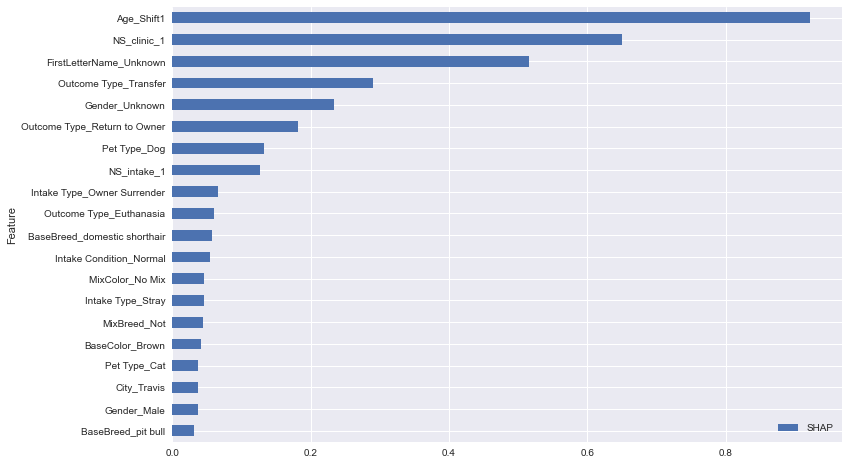

In [21]:
xgbm.feature_importance[['Feature','SHAP']].sort_values(by='SHAP',ascending=True).tail(20).plot.barh('Feature','SHAP',figsize=(12,8))

# 4. XGBoost Feature Engineering set 2

In [22]:
xgbm =ModelTrainer(model='xgb',data_loc=feat_eng2)
xgbm.base_run()

[21:01:54] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Best Threshold=0.318820, F-Score=0.652
precision, recall, threshold, f1score attributes updated
Best Threshold=0.072597, G-Mean=0.840
tpr, fpr, gmean attributes updated


ntree_limit is deprecated, use `iteration_range` or model slicing instead.


feature_importance attribute updated


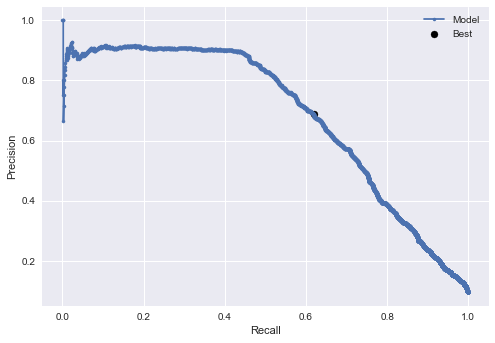

In [23]:
xgbm.plot_precision_recall_curve()

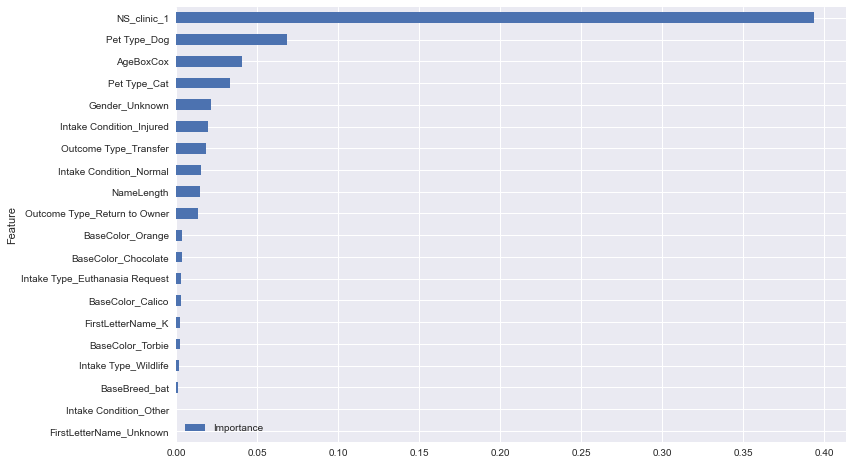

In [24]:
xgbm.plot_feature_importance()

In [25]:
xgbm.log

,Name,ModelType,F1,PR-AUC,G-mean,ROC-AUC,PRThreshold,ROCThreshold,LogTime
0,log0,log,NaN,0.390182,0.756192,0.839362,0.960302,0.612713,2022-02-22 20:21:04.997572
1,log1,log,0.475022,0.400104,0.756835,0.839932,0.800276,0.594330,2022-02-22 20:21:49.295069
2,xgb0,xgb,0.656668,0.688538,0.836489,0.917602,0.320857,0.076146,2022-02-22 20:22:07.573218
3,xgb1,xgb,0.658920,0.691520,0.839152,0.919203,0.308781,0.070381,2022-02-22 20:23:17.668959
4,xgbsmote0.1random0.122,xgb,0.656404,0.694120,0.837511,0.919497,0.395801,0.113287,2022-02-22 20:59:02.649490
5,xgbsmote0.1random0.179999999999999973,xgb,0.653551,0.694243,0.839835,0.918925,0.511347,0.157444,2022-02-22 20:59:18.981777
6,log2,log,0.475022,0.400104,0.756835,0.839932,0.800276,0.594330,2022-02-22 21:01:41.166538


<AxesSubplot:ylabel='Feature'>

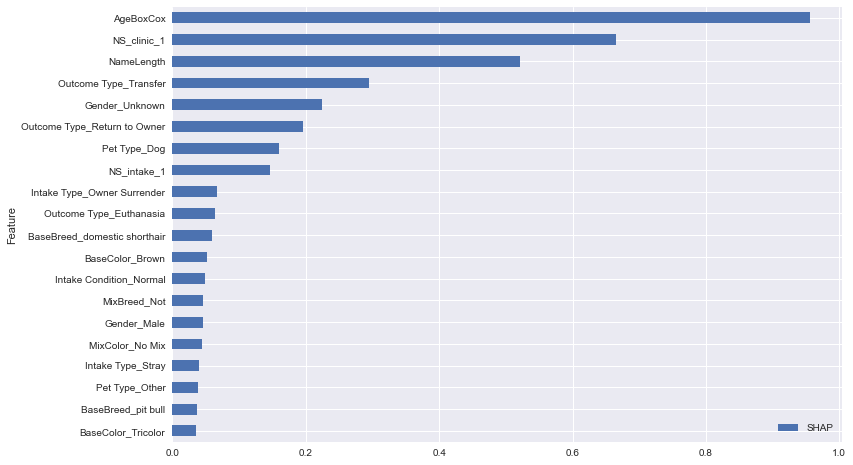

In [26]:
xgbm.feature_importance[['Feature','SHAP']].sort_values(by='SHAP',ascending=True).tail(20).plot.barh('Feature','SHAP',figsize=(12,8))

# 6. XGBoost Re-sampling

In [3]:
for i in np.arange(.10,.3,.02):
    for x in np.arange(.12,.32,.02):
        if x<i:
            pass
        else:
            xgbm =ModelTrainer(model='xgb',data_loc=feat_eng1,over_samp='smote',under_samp='random',over_weight=i,under_weight=x,random_state=10)
            xgbm.base_run()
xgbm.log

0    58025
1     6963
Name: Time at Center, dtype: int64
[21:14:15] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Best Threshold=0.372900, F-Score=0.656
precision, recall, threshold, f1score attributes updated
Best Threshold=0.120168, G-Mean=0.838
tpr, fpr, gmean attributes updated


ntree_limit is deprecated, use `iteration_range` or model slicing instead.


feature_importance attribute updated
0    49735
1     6963
Name: Time at Center, dtype: int64
[21:14:24] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Best Threshold=0.430820, F-Score=0.650
precision, recall, threshold, f1score attributes updated
Best Threshold=0.100528, G-Mean=0.837
tpr, fpr, gmean attributes updated


ntree_limit is deprecated, use `iteration_range` or model slicing instead.


feature_importance attribute updated
0    43518
1     6963
Name: Time at Center, dtype: int64
[21:14:33] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Best Threshold=0.435207, F-Score=0.652
precision, recall, threshold, f1score attributes updated
Best Threshold=0.148349, G-Mean=0.840
tpr, fpr, gmean attributes updated


ntree_limit is deprecated, use `iteration_range` or model slicing instead.


feature_importance attribute updated
0    38683
1     6963
Name: Time at Center, dtype: int64
[21:14:41] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Best Threshold=0.488992, F-Score=0.656
precision, recall, threshold, f1score attributes updated
Best Threshold=0.110026, G-Mean=0.838
tpr, fpr, gmean attributes updated


ntree_limit is deprecated, use `iteration_range` or model slicing instead.


feature_importance attribute updated
0    34815
1     6963
Name: Time at Center, dtype: int64
[21:14:49] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Best Threshold=0.474614, F-Score=0.653
precision, recall, threshold, f1score attributes updated
Best Threshold=0.140763, G-Mean=0.838
tpr, fpr, gmean attributes updated


ntree_limit is deprecated, use `iteration_range` or model slicing instead.


feature_importance attribute updated
0    31650
1     6963
Name: Time at Center, dtype: int64
[21:14:57] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Best Threshold=0.519882, F-Score=0.646
precision, recall, threshold, f1score attributes updated
Best Threshold=0.154866, G-Mean=0.841
tpr, fpr, gmean attributes updated


ntree_limit is deprecated, use `iteration_range` or model slicing instead.


feature_importance attribute updated
0    29012
1     6963
Name: Time at Center, dtype: int64
[21:15:04] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Best Threshold=0.558710, F-Score=0.652
precision, recall, threshold, f1score attributes updated
Best Threshold=0.167093, G-Mean=0.838
tpr, fpr, gmean attributes updated


ntree_limit is deprecated, use `iteration_range` or model slicing instead.


feature_importance attribute updated
0    26780
1     6963
Name: Time at Center, dtype: int64
[21:15:13] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Best Threshold=0.598051, F-Score=0.649
precision, recall, threshold, f1score attributes updated
Best Threshold=0.204823, G-Mean=0.838
tpr, fpr, gmean attributes updated


ntree_limit is deprecated, use `iteration_range` or model slicing instead.


feature_importance attribute updated
0    24867
1     6963
Name: Time at Center, dtype: int64
[21:15:21] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Best Threshold=0.557125, F-Score=0.651
precision, recall, threshold, f1score attributes updated
Best Threshold=0.224873, G-Mean=0.837
tpr, fpr, gmean attributes updated


ntree_limit is deprecated, use `iteration_range` or model slicing instead.


feature_importance attribute updated
0    23210
1     6963
Name: Time at Center, dtype: int64
[21:15:29] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Best Threshold=0.563725, F-Score=0.653
precision, recall, threshold, f1score attributes updated
Best Threshold=0.184221, G-Mean=0.834
tpr, fpr, gmean attributes updated


ntree_limit is deprecated, use `iteration_range` or model slicing instead.


feature_importance attribute updated
0    59678
1     8355
Name: Time at Center, dtype: int64
[21:15:38] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Best Threshold=0.484341, F-Score=0.646
precision, recall, threshold, f1score attributes updated
Best Threshold=0.115106, G-Mean=0.835
tpr, fpr, gmean attributes updated


ntree_limit is deprecated, use `iteration_range` or model slicing instead.


feature_importance attribute updated
0    52218
1     8355
Name: Time at Center, dtype: int64
[21:15:48] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Best Threshold=0.472912, F-Score=0.649
precision, recall, threshold, f1score attributes updated
Best Threshold=0.102664, G-Mean=0.838
tpr, fpr, gmean attributes updated


ntree_limit is deprecated, use `iteration_range` or model slicing instead.


feature_importance attribute updated
0    46416
1     8355
Name: Time at Center, dtype: int64
[21:15:58] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Best Threshold=0.405684, F-Score=0.648
precision, recall, threshold, f1score attributes updated
Best Threshold=0.147116, G-Mean=0.838
tpr, fpr, gmean attributes updated


ntree_limit is deprecated, use `iteration_range` or model slicing instead.


feature_importance attribute updated
0    41775
1     8355
Name: Time at Center, dtype: int64
[21:16:08] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


invalid value encountered in true_divide


Best Threshold=0.995498, F-Score=nan
precision, recall, threshold, f1score attributes updated
Best Threshold=0.142588, G-Mean=0.837
tpr, fpr, gmean attributes updated


ntree_limit is deprecated, use `iteration_range` or model slicing instead.


feature_importance attribute updated
0    37977
1     8355
Name: Time at Center, dtype: int64
[21:16:18] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Best Threshold=0.539584, F-Score=0.648
precision, recall, threshold, f1score attributes updated
Best Threshold=0.156299, G-Mean=0.836
tpr, fpr, gmean attributes updated


ntree_limit is deprecated, use `iteration_range` or model slicing instead.


feature_importance attribute updated
0    34812
1     8355
Name: Time at Center, dtype: int64
[21:16:29] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Best Threshold=0.520434, F-Score=0.649
precision, recall, threshold, f1score attributes updated
Best Threshold=0.180277, G-Mean=0.838
tpr, fpr, gmean attributes updated


ntree_limit is deprecated, use `iteration_range` or model slicing instead.


feature_importance attribute updated
0    32134
1     8355
Name: Time at Center, dtype: int64
[21:16:39] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Best Threshold=0.631707, F-Score=0.649
precision, recall, threshold, f1score attributes updated
Best Threshold=0.163414, G-Mean=0.837
tpr, fpr, gmean attributes updated


ntree_limit is deprecated, use `iteration_range` or model slicing instead.


feature_importance attribute updated
0    29839
1     8355
Name: Time at Center, dtype: int64
[21:16:49] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Best Threshold=0.580289, F-Score=0.640
precision, recall, threshold, f1score attributes updated
Best Threshold=0.213969, G-Mean=0.838
tpr, fpr, gmean attributes updated


ntree_limit is deprecated, use `iteration_range` or model slicing instead.


feature_importance attribute updated
0    27850
1     8355
Name: Time at Center, dtype: int64
[21:16:59] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Best Threshold=0.653397, F-Score=0.646
precision, recall, threshold, f1score attributes updated
Best Threshold=0.207074, G-Mean=0.835
tpr, fpr, gmean attributes updated


ntree_limit is deprecated, use `iteration_range` or model slicing instead.


feature_importance attribute updated
0    60925
1     9748
Name: Time at Center, dtype: int64
[21:17:09] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


invalid value encountered in true_divide
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


Best Threshold=0.989399, F-Score=nan
precision, recall, threshold, f1score attributes updated
Best Threshold=0.091816, G-Mean=0.835
tpr, fpr, gmean attributes updated
feature_importance attribute updated
0    54155
1     9748
Name: Time at Center, dtype: int64
[21:17:21] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Best Threshold=0.449563, F-Score=0.649
precision, recall, threshold, f1score attributes updated
Best Threshold=0.112268, G-Mean=0.833
tpr, fpr, gmean attributes updated


ntree_limit is deprecated, use `iteration_range` or model slicing instead.


feature_importance attribute updated
0    48740
1     9748
Name: Time at Center, dtype: int64
[21:17:33] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Best Threshold=0.516182, F-Score=0.643
precision, recall, threshold, f1score attributes updated
Best Threshold=0.127610, G-Mean=0.837
tpr, fpr, gmean attributes updated


ntree_limit is deprecated, use `iteration_range` or model slicing instead.


feature_importance attribute updated
0    44309
1     9748
Name: Time at Center, dtype: int64
[21:17:43] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Best Threshold=0.489817, F-Score=0.649
precision, recall, threshold, f1score attributes updated
Best Threshold=0.164776, G-Mean=0.835
tpr, fpr, gmean attributes updated


ntree_limit is deprecated, use `iteration_range` or model slicing instead.


feature_importance attribute updated
0    40616
1     9748
Name: Time at Center, dtype: int64
[21:17:52] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Best Threshold=0.502265, F-Score=0.648
precision, recall, threshold, f1score attributes updated
Best Threshold=0.129557, G-Mean=0.836
tpr, fpr, gmean attributes updated


ntree_limit is deprecated, use `iteration_range` or model slicing instead.


feature_importance attribute updated
0    37492
1     9748
Name: Time at Center, dtype: int64
[21:18:03] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Best Threshold=0.507985, F-Score=0.642
precision, recall, threshold, f1score attributes updated
Best Threshold=0.137168, G-Mean=0.835
tpr, fpr, gmean attributes updated


ntree_limit is deprecated, use `iteration_range` or model slicing instead.


feature_importance attribute updated
0    34814
1     9748
Name: Time at Center, dtype: int64
[21:18:12] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Best Threshold=0.569315, F-Score=0.653
precision, recall, threshold, f1score attributes updated
Best Threshold=0.189955, G-Mean=0.836
tpr, fpr, gmean attributes updated


ntree_limit is deprecated, use `iteration_range` or model slicing instead.


feature_importance attribute updated
0    32493
1     9748
Name: Time at Center, dtype: int64
[21:18:22] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Best Threshold=0.520351, F-Score=0.647
precision, recall, threshold, f1score attributes updated
Best Threshold=0.216614, G-Mean=0.837
tpr, fpr, gmean attributes updated


ntree_limit is deprecated, use `iteration_range` or model slicing instead.


feature_importance attribute updated
0    61894
1    11141
Name: Time at Center, dtype: int64
[21:18:31] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


invalid value encountered in true_divide
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


Best Threshold=0.988895, F-Score=nan
precision, recall, threshold, f1score attributes updated
Best Threshold=0.138784, G-Mean=0.832
tpr, fpr, gmean attributes updated
feature_importance attribute updated
0    55705
1    11141
Name: Time at Center, dtype: int64
[21:18:44] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Best Threshold=0.453715, F-Score=0.645
precision, recall, threshold, f1score attributes updated
Best Threshold=0.127749, G-Mean=0.833
tpr, fpr, gmean attributes updated


ntree_limit is deprecated, use `iteration_range` or model slicing instead.


feature_importance attribute updated
0    50640
1    11141
Name: Time at Center, dtype: int64
[21:18:54] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Best Threshold=0.482399, F-Score=0.644
precision, recall, threshold, f1score attributes updated
Best Threshold=0.133154, G-Mean=0.835
tpr, fpr, gmean attributes updated


ntree_limit is deprecated, use `iteration_range` or model slicing instead.


feature_importance attribute updated
0    46420
1    11141
Name: Time at Center, dtype: int64
[21:19:04] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


invalid value encountered in true_divide
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


Best Threshold=0.992472, F-Score=nan
precision, recall, threshold, f1score attributes updated
Best Threshold=0.122280, G-Mean=0.834
tpr, fpr, gmean attributes updated
feature_importance attribute updated
0    42850
1    11141
Name: Time at Center, dtype: int64
[21:19:14] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


invalid value encountered in true_divide
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


Best Threshold=0.994083, F-Score=nan
precision, recall, threshold, f1score attributes updated
Best Threshold=0.150546, G-Mean=0.836
tpr, fpr, gmean attributes updated
feature_importance attribute updated
0    39789
1    11141
Name: Time at Center, dtype: int64
[21:19:25] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Best Threshold=0.529178, F-Score=0.647
precision, recall, threshold, f1score attributes updated
Best Threshold=0.183579, G-Mean=0.833
tpr, fpr, gmean attributes updated


ntree_limit is deprecated, use `iteration_range` or model slicing instead.


feature_importance attribute updated
0    37136
1    11141
Name: Time at Center, dtype: int64
[21:19:35] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Best Threshold=0.560342, F-Score=0.642
precision, recall, threshold, f1score attributes updated
Best Threshold=0.173657, G-Mean=0.834
tpr, fpr, gmean attributes updated


ntree_limit is deprecated, use `iteration_range` or model slicing instead.


feature_importance attribute updated
0    62665
1    12533
Name: Time at Center, dtype: int64
[21:19:45] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Best Threshold=0.425596, F-Score=0.642
precision, recall, threshold, f1score attributes updated
Best Threshold=0.127674, G-Mean=0.833
tpr, fpr, gmean attributes updated


ntree_limit is deprecated, use `iteration_range` or model slicing instead.


feature_importance attribute updated
0    56968
1    12533
Name: Time at Center, dtype: int64
[21:19:56] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Best Threshold=0.441153, F-Score=0.644
precision, recall, threshold, f1score attributes updated
Best Threshold=0.102108, G-Mean=0.832
tpr, fpr, gmean attributes updated


ntree_limit is deprecated, use `iteration_range` or model slicing instead.


feature_importance attribute updated
0    52220
1    12533
Name: Time at Center, dtype: int64
[21:20:06] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Best Threshold=0.468828, F-Score=0.638
precision, recall, threshold, f1score attributes updated
Best Threshold=0.124880, G-Mean=0.834
tpr, fpr, gmean attributes updated


ntree_limit is deprecated, use `iteration_range` or model slicing instead.


feature_importance attribute updated
0    48203
1    12533
Name: Time at Center, dtype: int64
[21:20:17] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Best Threshold=0.513247, F-Score=0.642
precision, recall, threshold, f1score attributes updated
Best Threshold=0.130187, G-Mean=0.832
tpr, fpr, gmean attributes updated


ntree_limit is deprecated, use `iteration_range` or model slicing instead.


feature_importance attribute updated
0    44760
1    12533
Name: Time at Center, dtype: int64
[21:20:28] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


invalid value encountered in true_divide
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


Best Threshold=0.997191, F-Score=nan
precision, recall, threshold, f1score attributes updated
Best Threshold=0.144309, G-Mean=0.835
tpr, fpr, gmean attributes updated
feature_importance attribute updated
0    41776
1    12533
Name: Time at Center, dtype: int64
[21:20:39] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Best Threshold=0.518754, F-Score=0.638
precision, recall, threshold, f1score attributes updated
Best Threshold=0.182644, G-Mean=0.834
tpr, fpr, gmean attributes updated


ntree_limit is deprecated, use `iteration_range` or model slicing instead.


feature_importance attribute updated
0    63300
1    13926
Name: Time at Center, dtype: int64
[21:20:49] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Best Threshold=0.486400, F-Score=0.635
precision, recall, threshold, f1score attributes updated
Best Threshold=0.112515, G-Mean=0.834
tpr, fpr, gmean attributes updated


ntree_limit is deprecated, use `iteration_range` or model slicing instead.


feature_importance attribute updated
0    58025
1    13926
Name: Time at Center, dtype: int64
[21:21:01] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


invalid value encountered in true_divide
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


Best Threshold=0.996696, F-Score=nan
precision, recall, threshold, f1score attributes updated
Best Threshold=0.142292, G-Mean=0.835
tpr, fpr, gmean attributes updated
feature_importance attribute updated
0    53561
1    13926
Name: Time at Center, dtype: int64
[21:21:12] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Best Threshold=0.602908, F-Score=0.638
precision, recall, threshold, f1score attributes updated
Best Threshold=0.164947, G-Mean=0.834
tpr, fpr, gmean attributes updated


ntree_limit is deprecated, use `iteration_range` or model slicing instead.


feature_importance attribute updated
0    49735
1    13926
Name: Time at Center, dtype: int64
[21:21:22] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Best Threshold=0.545209, F-Score=0.637
precision, recall, threshold, f1score attributes updated
Best Threshold=0.164260, G-Mean=0.831
tpr, fpr, gmean attributes updated


ntree_limit is deprecated, use `iteration_range` or model slicing instead.


feature_importance attribute updated
0    46420
1    13926
Name: Time at Center, dtype: int64
[21:21:33] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Best Threshold=0.559842, F-Score=0.647
precision, recall, threshold, f1score attributes updated
Best Threshold=0.143284, G-Mean=0.832
tpr, fpr, gmean attributes updated


ntree_limit is deprecated, use `iteration_range` or model slicing instead.


feature_importance attribute updated
0    63829
1    15319
Name: Time at Center, dtype: int64
[21:21:44] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Best Threshold=0.502689, F-Score=0.634
precision, recall, threshold, f1score attributes updated
Best Threshold=0.133452, G-Mean=0.832
tpr, fpr, gmean attributes updated


ntree_limit is deprecated, use `iteration_range` or model slicing instead.


feature_importance attribute updated
0    58919
1    15319
Name: Time at Center, dtype: int64
[21:21:56] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Best Threshold=0.473312, F-Score=0.640
precision, recall, threshold, f1score attributes updated
Best Threshold=0.128931, G-Mean=0.835
tpr, fpr, gmean attributes updated


ntree_limit is deprecated, use `iteration_range` or model slicing instead.


feature_importance attribute updated
0    54710
1    15319
Name: Time at Center, dtype: int64
[21:22:07] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Best Threshold=0.576706, F-Score=0.637
precision, recall, threshold, f1score attributes updated
Best Threshold=0.144821, G-Mean=0.832
tpr, fpr, gmean attributes updated


ntree_limit is deprecated, use `iteration_range` or model slicing instead.


feature_importance attribute updated
0    51063
1    15319
Name: Time at Center, dtype: int64
[21:22:18] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Best Threshold=0.556913, F-Score=0.640
precision, recall, threshold, f1score attributes updated
Best Threshold=0.189853, G-Mean=0.831
tpr, fpr, gmean attributes updated


ntree_limit is deprecated, use `iteration_range` or model slicing instead.


feature_importance attribute updated
0    64273
1    16711
Name: Time at Center, dtype: int64
[21:22:29] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Best Threshold=0.506566, F-Score=0.635
precision, recall, threshold, f1score attributes updated
Best Threshold=0.142447, G-Mean=0.831
tpr, fpr, gmean attributes updated


ntree_limit is deprecated, use `iteration_range` or model slicing instead.


feature_importance attribute updated
0    59682
1    16711
Name: Time at Center, dtype: int64
[21:22:41] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Best Threshold=0.528394, F-Score=0.636
precision, recall, threshold, f1score attributes updated
Best Threshold=0.152393, G-Mean=0.834
tpr, fpr, gmean attributes updated


ntree_limit is deprecated, use `iteration_range` or model slicing instead.


feature_importance attribute updated
0    55703
1    16711
Name: Time at Center, dtype: int64
[21:22:53] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Best Threshold=0.447255, F-Score=0.633
precision, recall, threshold, f1score attributes updated
Best Threshold=0.158296, G-Mean=0.833
tpr, fpr, gmean attributes updated


ntree_limit is deprecated, use `iteration_range` or model slicing instead.


feature_importance attribute updated
0    64657
1    18104
Name: Time at Center, dtype: int64
[21:23:04] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Best Threshold=0.501639, F-Score=0.639
precision, recall, threshold, f1score attributes updated
Best Threshold=0.154961, G-Mean=0.831
tpr, fpr, gmean attributes updated


ntree_limit is deprecated, use `iteration_range` or model slicing instead.


feature_importance attribute updated
0    60346
1    18104
Name: Time at Center, dtype: int64
[21:23:16] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Best Threshold=0.533640, F-Score=0.638
precision, recall, threshold, f1score attributes updated
Best Threshold=0.178713, G-Mean=0.830
tpr, fpr, gmean attributes updated


ntree_limit is deprecated, use `iteration_range` or model slicing instead.


feature_importance attribute updated
0    64990
1    19497
Name: Time at Center, dtype: int64
[21:23:27] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Best Threshold=0.492414, F-Score=0.636
precision, recall, threshold, f1score attributes updated
Best Threshold=0.187847, G-Mean=0.829
tpr, fpr, gmean attributes updated


ntree_limit is deprecated, use `iteration_range` or model slicing instead.


feature_importance attribute updated


,Name,ModelType,F1,PR-AUC,G-mean,ROC-AUC,PRThreshold,ROCThreshold,LogTime
0,log0,log,NaN,0.390182,0.756192,0.839362,0.960302,0.612713,2022-02-22 20:21:04.997572
1,log1,log,0.475022,0.400104,0.756835,0.839932,0.800276,0.594330,2022-02-22 20:21:49.295069
2,xgb0,xgb,0.656668,0.688538,0.836489,0.917602,0.320857,0.076146,2022-02-22 20:22:07.573218
3,xgb1,xgb,0.658920,0.691520,0.839152,0.919203,0.308781,0.070381,2022-02-22 20:23:17.668959
4,xgbsmote0.1random0.122,xgb,0.656404,0.694120,0.837511,0.919497,0.395801,0.113287,2022-02-22 20:59:02.649490
5,xgbsmote0.1random0.179999999999999973,xgb,0.653551,0.694243,0.839835,0.918925,0.511347,0.157444,2022-02-22 20:59:18.981777
6,log2,log,0.475022,0.400104,0.756835,0.839932,0.800276,0.594330,2022-02-22 21:01:41.166538
7,xgbsmote0.1random0.25999999999999994,xgb,0.654742,0.695249,0.838328,0.918467,0.618239,0.177673,2022-02-22 21:02:39.836972
8,xgbsmote0.1random0.125,xgb,0.650444,0.698223,0.840951,0.920430,0.395249,0.096091,2022-02-22 21:13:25.050133


0    54155
1     9748
Name: Time at Center, dtype: int64
[21:07:18] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Best Threshold=0.476288, F-Score=0.645
precision, recall, threshold, f1score attributes updated
Best Threshold=0.131139, G-Mean=0.833
tpr, fpr, gmean attributes updated


ntree_limit is deprecated, use `iteration_range` or model slicing instead.


feature_importance attribute updated


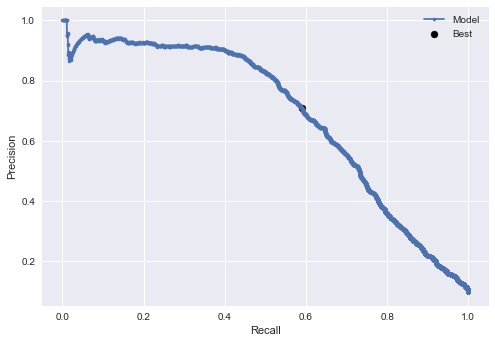

,Name,ModelType,F1,PR-AUC,G-mean,ROC-AUC,PRThreshold,ROCThreshold,LogTime
0,log0,log,NaN,0.390182,0.756192,0.839362,0.960302,0.612713,2022-02-22 20:21:04.997572
1,log1,log,0.475022,0.400104,0.756835,0.839932,0.800276,0.594330,2022-02-22 20:21:49.295069
2,xgb0,xgb,0.656668,0.688538,0.836489,0.917602,0.320857,0.076146,2022-02-22 20:22:07.573218
3,xgb1,xgb,0.658920,0.691520,0.839152,0.919203,0.308781,0.070381,2022-02-22 20:23:17.668959
4,xgbsmote0.1random0.122,xgb,0.656404,0.694120,0.837511,0.919497,0.395801,0.113287,2022-02-22 20:59:02.649490
5,xgbsmote0.1random0.179999999999999973,xgb,0.653551,0.694243,0.839835,0.918925,0.511347,0.157444,2022-02-22 20:59:18.981777
6,log2,log,0.475022,0.400104,0.756835,0.839932,0.800276,0.594330,2022-02-22 21:01:41.166538
7,xgbsmote0.1random0.25999999999999994,xgb,0.654742,0.695249,0.838328,0.918467,0.618239,0.177673,2022-02-22 21:02:39.836972


In [28]:
xgbm =ModelTrainer(model='xgb',data_loc=feat_eng1,over_samp='smote',under_samp='random',over_weight=.14,under_weight=.18)
xgbm.base_run()
xgbm.plot_precision_recall_curve()
xgbm.log

In [29]:
xgbm.pr_auc

0.6855170363272995

## 7. XGBoost Hyperparameter Tuning

In [30]:
grid = {}
xgbm.optimize_run()

TypeError: optimize_run() missing 1 required positional argument: 'grid'